<a href="https://colab.research.google.com/github/SAZA-KARTIAN/Ascensores_Chile/blob/main/DB_Ascensores_certificados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Data Science
## Ascensores certificados en Chile 2020 -2025

##Objetivos Generales

- Identificar geográfica y técnicamente los equipos de transporte vertical en Chile.
- Analizar el posicionamiento de mercado de empresas mantenedoras e instaladoras.
- Cuantificar el crecimiento del rubro e identificar métricas clave.
- Evaluar el nivel de profesionalización del sector.
- Identificar oportunidades de negocio basadas en datos.

##Preguntas Clave

1. ¿Cuántos equipos certificados existen en Chile y dónde se ubican?
2. ¿Cuáles son las principales empresas en instalación y mantenimiento?
3. ¿Qué proporción del parque de equipos está activo o inactivo?
4. ¿Cuáles son las oportunidades de recuperación de cartera para empresas mantenedoras?
5. ¿Dónde existen brechas entre permisos de edificación e instalación efectiva de ascensores?


##Fuentes de Datos
- **MINVU:** Registro nacional de equipos certificados desde 2020 a enero de 2025.
- **Aduanas:** Importaciones de ascensores por empresa y marca (2016-2024).
- **Permisos de Edificación:** Desde 2012 a 2024, por comuna y tipo de edificación.



# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# Carga de Base de Datos

In [ ]:
##Carga del archivo entregado por MINVU - Ley de transparencia
data = pd.read_excel('AP001T0006429.xlsx')

# Muestra las primeras filas del DataFrame para verificar que se cargó correctamente
print(data.head())

#Fijamos una semilla para reproducibilidad
np.random.seed(0)


  FECHA Y HORA DE LA CERTIFICACION                CODIGO MARCA ASCENSOR  \
0          2020-01-02 10:26:41.507  1415806053-00023001A           KONE   
1          2020-01-02 10:33:16.613  1415806053-00023002A           KONE   
2          2020-01-02 10:57:13.020   730100215-00001001A           OTIS   
3          2020-01-02 11:00:36.770   730100215-00001002A           OTIS   
4          2020-01-02 11:03:03.070   730100215-00001003A           OTIS   

                               DIRECCION NUMERO  REGION  COMUNA  \
0  AVENIDA DEL VALLE. CIUDAD EMPRESARIAL    819      13   14158   
1  AVENIDA DEL VALLE. CIUDAD EMPRESARIAL    819      13   14158   
2             AVENIDA ANÍBAL LEÓN BUSTOS    457       7    7301   
3                     ANÍBAL LEÓN BUSTOS    457       7    7301   
4                     ANÍBAL LEÓN BUSTOS    457       7    7301   

  DESTINO DEL INMUEBLE           TIPO DEL EQUIPO AÑO DE INSTALACION  ...  \
0         Equipamiento  ascensor electromecánico    Sin Informacion  .



---



##¿Cuántos valores faltantes hay?

In [ ]:
# Contar valores faltantes por columna
recuento_valores_faltantes = data.isnull().sum()

# Ver los 10 primeros
recuento_valores_faltantes[0:29]

,0
FECHA Y HORA DE LA CERTIFICACION,0
CODIGO,0
MARCA ASCENSOR,12752
DIRECCION,0
NUMERO,0
REGION,0
COMUNA,0
DESTINO DEL INMUEBLE,0
TIPO DEL EQUIPO,0
AÑO DE INSTALACION,0


In [ ]:
# Total de celdas
celdas_totales = np.prod(data.shape)

# Total de valores faltantes
total_faltantes = recuento_valores_faltantes.sum()

# Porcentaje de datos faltantes
porcentaje_faltante = (total_faltantes / celdas_totales) * 100
print(porcentaje_faltante)


1.2581728196031197


# Características de la BD

In [ ]:
# Uso de shape
print("Dimensiones:", data.shape)

Dimensiones: (149212, 29)


In [ ]:
# Uso de columns
print("Variables:", data.columns)

Variables: Index(['FECHA Y HORA DE LA CERTIFICACION', 'CODIGO', 'MARCA ASCENSOR',
       'DIRECCION', 'NUMERO', 'REGION', 'COMUNA', 'DESTINO DEL INMUEBLE',
       'TIPO DEL EQUIPO', 'AÑO DE INSTALACION', 'CAPACIDAD',
       'VELOCIDAD NOMINAL', 'NUMERO DE PARADAS', 'TIPO DE PUERTA',
       'UBICACIÓN SALA DE MAQUINAS', 'NUMERO NORMA',
       'FECHA PERMISO EDIFICACIÓN', 'FECHA RECEPCIÓN MUNICIPAL',
       'NOMBRE DE QUIEN CERTIFICA', 'RAZON SOCIAL CERTIFICADOR',
       'RUT CERTIFICADOR', 'DIGITO', 'NOMBRE DEL ADMINISTRADOR',
       'NOMBRE DEL INSTALADOR', 'RUT DEL INSTALADOR', 'DIGITO.1',
       'NOMBRE MANTENEDOR ULTIMA MANTENCION',
       'RUT MANTENEDOR ULTIMA MANTENCION', 'DIGITO.2'],
      dtype='object')


In [ ]:
# Uso de info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149212 entries, 0 to 149211
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   FECHA Y HORA DE LA CERTIFICACION     149212 non-null  object 
 1   CODIGO                               149212 non-null  object 
 2   MARCA ASCENSOR                       136460 non-null  object 
 3   DIRECCION                            149212 non-null  object 
 4   NUMERO                               149212 non-null  object 
 5   REGION                               149212 non-null  int64  
 6   COMUNA                               149212 non-null  int64  
 7   DESTINO DEL INMUEBLE                 149212 non-null  object 
 8   TIPO DEL EQUIPO                      149212 non-null  object 
 9   AÑO DE INSTALACION                   149212 non-null  object 
 10  CAPACIDAD                            149212 non-null  float64
 11  VELOCIDAD NOM

#Limpieza General de Strings

In [ ]:
# Lista de columnas de tipo string que queremos limpiar (ajusta según tus columnas)
columnas_string = data.select_dtypes(include=['object']).columns

In [ ]:
columnas_string


Index(['FECHA Y HORA DE LA CERTIFICACION', 'CODIGO', 'MARCA ASCENSOR',
       'DIRECCION', 'NUMERO', 'DESTINO DEL INMUEBLE', 'TIPO DEL EQUIPO',
       'AÑO DE INSTALACION', 'TIPO DE PUERTA', 'UBICACIÓN SALA DE MAQUINAS',
       'NUMERO NORMA', 'FECHA PERMISO EDIFICACIÓN',
       'FECHA RECEPCIÓN MUNICIPAL', 'NOMBRE DE QUIEN CERTIFICA',
       'RAZON SOCIAL CERTIFICADOR', 'DIGITO', 'NOMBRE DEL ADMINISTRADOR',
       'NOMBRE DEL INSTALADOR', 'RUT DEL INSTALADOR', 'DIGITO.1',
       'NOMBRE MANTENEDOR ULTIMA MANTENCION', 'DIGITO.2'],
      dtype='object')

In [ ]:
valores_a_reemplazar = ['Sin Informacion', '', ' ', 'nan', 'Nan', 'NaN'] # Agrega otros si es necesario

for col in columnas_string:
    # Convertir a string primero para asegurar que .str funcione
    data[col] = data[col].astype(str)
    # Reemplazar valores específicos por NaN
    data[col] = data[col].replace(valores_a_reemplazar, np.nan)
    # Aplicar limpieza solo si la columna no es completamente NaN después del reemplazo
    if data[col].notna().any():
      # Convertir a minúsculas (opcional, considera si lo necesitas para todas)
      # df[col] = df[col].str.lower()
      # Eliminar espacios al inicio y final
      data[col] = data[col].str.strip()
      # Reemplazar múltiples espacios internos con uno solo
      data[col] = data[col].str.replace(r'\s+', ' ', regex=True)
      # Reemplazar el espacio no estándar (nbsp) específicamente visto
      data[col] = data[col].str.replace('\u00A0', ' ', regex=False) # \u00A0 es nbsp

In [ ]:
# --- 3. Limpieza Específica por Columna ---

# Estandarizar Dígitos Verificadores (a Mayúsculas)
# Asegúrate que los nombres de las columnas de dígito son correctos
columnas_digito = [col for col in data.columns if 'DIGITO' in col]
for col in columnas_digito:
    if data[col].notna().any(): # Verificar si hay datos no nulos antes de operar
        data[col] = data[col].str.upper()

# Estandarizar abreviaturas en Direcciones
if 'DIRECCION' in data.columns and data['DIRECCION'].notna().any():
    data['DIRECCION'] = data['DIRECCION'].str.replace(r'\bAVDA\b\.?', 'AVENIDA', regex=True, case=False)
    data['DIRECCION'] = data['DIRECCION'].str.replace(r'\bAV\b\.?', 'AVENIDA', regex=True, case=False)
    # Agrega más reemplazos si es necesario (ej. C/ por CALLE)

# Estandarizar sufijos comunes en nombres de empresas/personas
columnas_nombres = [
    'NOMBRE DE QUIEN CERTIFICA', 'RAZON SOCIAL CERTIFICADOR',
    'NOMBRE DEL ADMINISTRADOR', 'NOMBRE DEL INSTALADOR',
    'NOMBRE MANTENEDOR ULTIMA MANTENCION'
]
sufijos_a_estandarizar = {
    r'\bCOMPANIA LIMITADA\b': 'LTDA',
    r'\bLIMITADA\b': 'LTDA',
    r'\bSOCIEDAD ANONIMA\b': 'S.A.',
    r'\bS A\b': 'S.A.',
    r'\bSPA\b': 'SPA', # Mantener SPA puede ser útil
    r'\bE\.?I\.?R\.?L\.?\b': 'EIRL', # Estandarizar EIRL
    r'\s*\(CHILE\)\s*': '' # Eliminar (CHILE) y espacios alrededor
    # Agrega más reglas según veas necesario
}
for col in columnas_nombres:
    if col in data.columns and data[col].notna().any():
        for patron, reemplazo in sufijos_a_estandarizar.items():
            data[col] = data[col].str.replace(patron, reemplazo, regex=True, case=False)
        # Re-aplicar strip y reemplazo de espacios múltiples por si acaso
        data[col] = data[col].str.strip()
        data[col] = data[col].str.replace(r'\s+', ' ', regex=True)

In [ ]:
# --- 4. Conversión de Tipos ---

# Convertir Fechas (reemplaza 'Sin Informacion' con NaN antes)
columnas_fecha = [
    'FECHA Y HORA DE LA CERTIFICACION',
    'FECHA PERMISO EDIFICACIÓN',
    'FECHA RECEPCIÓN MUNICIPAL'
]
for col in columnas_fecha:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce') # 'coerce' convierte errores en NaT (Not a Time)

# Convertir Columnas Numéricas (reemplaza 'Sin Informacion' con NaN antes)
columnas_numericas = [
    'AÑO DE INSTALACION', 'CAPACIDAD', 'VELOCIDAD NOMINAL', 'NUMERO DE PARADAS',
    'RUT CERTIFICADOR', 'RUT DEL INSTALADOR', 'RUT MANTENEDOR ULTIMA MANTENCION'
    # Añadir REGION, COMUNA si deben ser numéricas y no categóricas
]
for col in columnas_numericas:
     if col in data.columns:
        # Limpiar puntos o comas si son separadores de miles antes de convertir
        if data[col].dtype == 'object': # Solo si es string
             data[col] = data[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce') # 'coerce' convierte errores en NaN

# Considerar AÑO DE INSTALACION como entero (si aplica y después de limpiar NaNs)
if 'AÑO DE INSTALACION' in data.columns:
    # Usar Int64 (nullable integer) para permitir NaNs
     data['AÑO DE INSTALACION'] = data['AÑO DE INSTALACION'].astype('Int64')

In [ ]:
# --- 5. Revisar Resultados ---
print("\n--- DataFrame Limpio (primeras filas) ---")
print(data.head())
print("\n--- Información Limpia ---")
data.info()

# Revisar valores únicos de algunas columnas clave después de limpiar
print("\n--- Valores Únicos Limpios (Ejemplos) ---")
if 'MARCA ASCENSOR' in data.columns:
    print("\nMARCA ASCENSOR:")
    print(data['MARCA ASCENSOR'].value_counts(dropna=False)) # dropna=False para ver los NaN
if 'DIGITO' in data.columns: # Asumiendo que la primera columna DIGITO es representativa
    print("\nDIGITO (Certificador):")
    print(data['DIGITO'].value_counts(dropna=False))
if 'NOMBRE MANTENEDOR ULTIMA MANTENCION' in data.columns:
    print("\nNOMBRE MANTENEDOR ULTIMA MANTENCION:")
    print(data['NOMBRE MANTENEDOR ULTIMA MANTENCION'].value_counts(dropna=False))
if 'DIRECCION' in data.columns:
    print("\nDIRECCION (primeros 20):")
    print(data['DIRECCION'].value_counts(dropna=False).head(20))

# Puedes guardar el dataframe limpio
# df.to_csv('tu_archivo_limpio.csv', index=False)
#data.to_excel('tu_archivo_limpio.xlsx', index=False)


--- DataFrame Limpio (primeras filas) ---
  FECHA Y HORA DE LA CERTIFICACION                CODIGO MARCA ASCENSOR  \
0          2020-01-02 10:26:41.507  1415806053-00023001A           KONE   
1          2020-01-02 10:33:16.613  1415806053-00023002A           KONE   
2          2020-01-02 10:57:13.020   730100215-00001001A           OTIS   
3          2020-01-02 11:00:36.770   730100215-00001002A           OTIS   
4          2020-01-02 11:03:03.070   730100215-00001003A           OTIS   

                               DIRECCION NUMERO  REGION  COMUNA  \
0  AVENIDA DEL VALLE. CIUDAD EMPRESARIAL    819      13   14158   
1  AVENIDA DEL VALLE. CIUDAD EMPRESARIAL    819      13   14158   
2             AVENIDA ANÍBAL LEÓN BUSTOS    457       7    7301   
3                     ANÍBAL LEÓN BUSTOS    457       7    7301   
4                     ANÍBAL LEÓN BUSTOS    457       7    7301   

  DESTINO DEL INMUEBLE           TIPO DEL EQUIPO  AÑO DE INSTALACION  ...  \
0         Equipamiento  as

#Trabajando en MARCA ASCENSOR

In [ ]:
print("Valores únicos en 'MARCA ASCENSOR' ANTES de la corrección:")
# value_counts muestra los valores y su frecuencia. dropna=False incluye el conteo de NaNs si los hay.
print(data['MARCA ASCENSOR'].value_counts(dropna=False))

Valores únicos en 'MARCA ASCENSOR' ANTES de la corrección:
MARCA ASCENSOR
SCHINDLER       35836
OTIS            21284
NaN             16128
THYSSENKRUPP    12540
KONE            11017
                ...  
ELSER               1
LIFTECNNIK          1
ALLWEIER AG         1
SOMOGLIA            1
TESIS               1
Name: count, Length: 953, dtype: int64


In [ ]:
# Diccionario de correcciones: {'valor_a_buscar': 'valor_nuevo'}
correcciones_marca = {
    ########## TKE ##########
    'THYSSENKRUPP': 'TKE',
    'THE': 'TKE',
    'THY': 'TKE',
    'TK': 'TKE',
    'ASC DEL SUR': 'TKE',
    'THYSSEN': 'TKE',
    'THYSSEN KRUPP': 'TKE',
    'THYSENKRUPP': 'TKE',
    'THYSSEKRUPP': 'TKE',
    'THYSSENKRUP': 'TKE',
    'THYSENKRUP': 'TKE',
    'THYSSENKRUPP - SINERGY EVOLUTI': 'TKE',
    'THYSSENKRUP ELEVADORES S.A': 'TKE',
    'THYSSENKRUPP EM33': 'TKE',
    'THYSSENKRUP ELEVADORES': 'TKE',
    'THYSSENKRUPP - TUGUELA': 'TKE',
    'CENIA THYSSEN': 'TKE',
    'THYSSENKRUPP - FT722': 'TKE',
    'THYSEENKRUPP': 'TKE',
    'THYSSENKRUPP - - FT722': 'TKE',
    'THYSSENKRUPP - CMC4': 'TKE',
    'THYSSENKRUPP ELEVADORES S.A.': 'TKE',
    'THYSSEN GROUP': 'TKE',
    'THYSSENKRUPP - SF PK3-6EK': 'TKE',
    'THYSSENKRUPP ELEVADORES': 'TKE',
    'THYSSENKRUPP ELEVADORES S.A': 'TKE',
    'THYSSENKRUPP BOETICHER': 'TKE',
    'THYSSENKRUPP ELEVATOR': 'TKE',
    'THYSSENKRUPP - SINERGY - BOET': 'TKE',
    'THYSSENKRUPP ELEVADORES S. A.': 'TKE',
    'THYSENKROUPP': 'TKE',
    'THYSSEN-KRUPP': 'TKE',
    'THYSSENKRUPPSICOR': 'TKE',
    'THYSSENKRUPP - BOETTICHER': 'TKE',
    'ELEVADORES SUR S.A. - THYSSEN': 'TKE',
    'THYSSEMKRUPP': 'TKE',
    'THYSSEN BOETTICHER': 'TKE',
    'THYSSEN BOETTINCHER': 'TKE',
    'THYSSENE': 'TKE',
    'THYSEN': 'TKE',
    'THYSSENKROUP': 'TKE',
    'THYSSENKRUPPT': 'TKE',
    'THYSSENNKRUPP': 'TKE',
    'THYSSENKTRUPP': 'TKE',
    'THUSSENKRUPP': 'TKE',
    'THYSENNKRUPP': 'TKE',
    'THYSSENKRUPP- M': 'TKE',
    'THYSSENKKRUPP': 'TKE',
    'THYSSENKRUPP2': 'TKE',
    'TYHSEEN': 'TKE',
    'TYHSSENKRUPP': 'TKE',
    'TYSSENKRUPP': 'TKE',
    'TYSSENKRUUP': 'TKE',
    'SUR': 'TKE',
    'ELEVADORES SUR': 'TKE',
    'ASCENSORES SUR': 'TKE',
    'ELEVADORES SUR S.A': 'TKE',
    'ASCENSORES SUR S.A': 'TKE',
    'ELEVADORES SUR S.A.': 'TKE',
    'ASC SUR': 'TKE',
    'ASCENSORSUR': 'TKE',
    'ELEVADORES SUR S.A.- TKE BRASI': 'TKE',
    'ASCENSOR SUR': 'TKE',
    'ELEVADOR SUR': 'TKE',
    'TK ELEVADORES CHILE SPA': 'TKE',
    'TK ELEVADORES BRASIL': 'TKE',
    'TK ELEVADORES': 'TKE',
    'TK ASCENSORES': 'TKE',
    'TKE-BRA': 'TKE',
    'TKE ELEVADORES': 'TKE',
    'TKE ELEVADORES SA': 'TKE',
    'CENIA': 'TKE',
    'CENIA PINGON': 'TKE',
    'CENIA ASCENSORES': 'TKE',
    'CENIA PINGON SA': 'TKE',
    'CENIA ALFA LTDA.': 'TKE',
    'CENIA ALFA ASCENSORES': 'TKE',
    'SYNERGY': 'TKE',
    'CENA': 'TKE',
    ########## KONE ##########
    'KONE': 'KONE',
    'KONE (MODERNIZACIÃ“N PARCIAL)': 'KONE',
    'KONE (MODERNIZADO PARCIAL)': 'KONE',
    'KONE 500': 'KONE',
    'KONE 5000': 'KONE',
    'KONE ELEVATORS': 'KONE',
    'KONE MONOSPACE': 'KONE',
    'KONE-MCPUARZA': 'KONE',
    'KOE': 'KONE',
    'KONNE': 'KONE',
    'KHONE': 'KONE',
    ########## SCHINDLER ##########
    'SCHINDLER': 'SCHINDLER', # Mantener estándar
    'SCHINDLER S.A.': 'SCHINDLER', # Estandarizar
    'ASCENSORES SCHINDLER CHILE S.A': 'SCHINDLER',
    'ATLAS SCHINDLER': 'SCHINDLER',
    'ATLAS/SCHINDLER': 'SCHINDLER',
    'MACPUERZA â€“ ATLAS-SCHINDLER': 'SCHINDLER',
    'SCHIDLER': 'SCHINDLER',
    'SCHIDNLER': 'SCHINDLER',
    'SCHINDELR': 'SCHINDLER',
    'SCHINDLE': 'SCHINDLER',
    'SCHINDLER (BRASIL)': 'SCHINDLER',
    'SCHINDLER (CHINO)': 'SCHINDLER',
    'SCHINDLER (EU)': 'SCHINDLER',
    'SCHINDLER (MOD THYSSENKRUPP)': 'SCHINDLER',
    'SCHINDLER 5400 MRL': 'SCHINDLER',
    'SCHINDLER ATLAS': 'SCHINDLER',
    'SCHINDLER GMV TIPO 3010': 'SCHINDLER',
    'SCHINDLER MOD CON MOVILIFT': 'SCHINDLER',
    'SCHINDLER MODERNIZAD': 'SCHINDLER',
    'SCHINDLER MODERNIZADO': 'SCHINDLER',
    'SCHINDLER VIMASA': 'SCHINDLER',
    'SCHINDLER/ATLAS': 'SCHINDLER',
    'SCHINLDER': 'SCHINDLER',
    'SCHNDLER': 'SCHINDLER',
    'W140 SCHINDLER': 'SCHINDLER',
    'ASCENSORES ATLAS':'SCHINDLER',
    'ATLAS':'SCHINDLER',
    'ATLAS - VILLARES': 'SCHINDLER',
    'ATLAS ELEVADORES': 'SCHINDLER',
    'ATLAS S.A.': 'SCHINDLER',
    'ATLAS VILLARD': 'SCHINDLER',
    'ATLAS VILLARES': 'SCHINDLER',
    'ATLAS VILLARES/': 'SCHINDLER',
    'ATLAS-VILLARES': 'SCHINDLER',
    'ELEVADORES ATLAS': 'SCHINDLER',
    '3300': 'SCHINDLER',
    'SHINDLER': 'SCHINDLER',
    'WESTINGHOUSE': 'SCHINDLER',
    'WESTINHOUSE': 'SCHINDLER',
    'VILLARES': 'SCHINDLER',
    'SCHNDLER': 'SCHINDLER',
    ########## OTIS ##########
    'OTIS': 'OTIS', # Si apareciera OTIS S.A., etc.
    'ASCENSORES OTIS-CHILE LIMITADA': 'OTIS',
    'LG - OTIS': 'OTIS-LG',
    'LG OTIS': 'OTIS-LG',
    'LG -OTIS': 'OTIS-LG',
    'LG- OTIS': 'OTIS-LG',
    'LG-OTIS': 'OTIS-LG',
    'OTIS - GCS220': 'OTIS',
    'OTIS - GEN2': 'OTIS',
    'OTIS - GMV': 'OTIS',
    'OTIS - HIDRAL': 'OTIS',
    'OTIS - LG': 'OTIS',
    'OTIS - MONTANARI': 'OTIS',
    'OTIS - RABB ROCHETTE': 'OTIS',
    'OTIS - XO21NP': 'OTIS',
    'OTIS - XOP': 'OTIS',
    'OTIS - XOP H': 'OTIS',
    'OTIS - XOP21NP': 'OTIS',
    'OTIS - XOP-H': 'OTIS',
    'OTIS (MÃ‰XICO) - KINETEK (USA)': 'OTIS',
    'OTIS (MODERNIZADO)': 'OTIS',
    'OTIS 2000VF': 'OTIS',
    'OTIS GEN2': 'OTIS',
    'OTIS LG': 'OTIS-LG',
    'OTIS- LG': 'OTIS-LG',
    'OTIS MODERNIZADO': 'OTIS',
    'OTIS MR': 'OTIS',
    'OTIS XIZI': 'OTIS',
    'OTIS XO-508': 'OTIS',
    'OTIS-GMV': 'OTIS',
    'OTIS-LG': 'OTIS-LG',
    'OTIS-MOT': 'OTIS',
    'OTISS': 'OTIS',
    'OTIS-XIZI': 'OTIS',
    'SIGMA OTIS': 'OTIS',
    'SIGMA -OTIS': 'OTIS',
    'XIZI OTIS': 'OTIS',
    'OT': 'OTIS',
    'OTI': 'OTIS',
    'OYIS': 'OTIS',
    'OITS': 'OTIS',
    'GEN': 'OTIS',
    ########## LG ##########
    'LG': 'LG',
    'LG - MODERNIZADO NIDEC': 'LG',
    'LG ELECTRONICS': 'LG',
    'LG ELECTRONICS INC': 'LG',
    'LG ELECTRONICS INC.': 'LG',
    'LG ELEVATOR': 'LG',
    'LG GOLDSTAR': 'LG',
    'SIGMA LG': 'LG',
    'GOLDSTAR': 'LG',
    'GOLDSTAR (LG)': 'LG',
    ########## MITSUBISHI ##########
    'MITSUBISHI': 'MITSUBISHI',
    'MITSIBISHI': 'MITSUBISHI',
    'MITSILUBISHI': 'MITSUBISHI',
    'MITSUBICHI': 'MITSUBISHI',
    'MITSUBIHI': 'MITSUBISHI',
    'MITSUBISH': 'MITSUBISHI',
    'MITSUBISHI - GPS-3': 'MITSUBISHI',
    'MITSUBISHI (JAPÃ“N)': 'MITSUBISHI',
    'MITSUBISHI ELECTRIC': 'MITSUBISHI',
    'MITSUBISHI ELECTRIC CORPORATIO': 'MITSUBISHI',
    'MITSUBISHO': 'MITSUBISHI',
    'MITSUBSHI': 'MITSUBISHI',
    'MITSUBSHI ELECTRIC CORPORATION': 'MITSUBISHI',
    'MITSUBUSHI': 'MITSUBISHI',
    'MISUBISHI': 'MITSUBISHI',
    'MITUSBUSHI': 'MITSUBISHI',
    'MITAUBISHI': 'MITSUBISHI',
    ########## ORONA ##########
    'ORONA': 'ORONA',
    'LANCOR ORONA': 'ORONA',
    'ORONA RDZ II': 'ORONA',
    'ORONA RDZII': 'ORONA',
    'ORONA S.COOP': 'ORONA',
    'ORONOA': 'ORONA',
    'ORORNA': 'ORONA',
    'ORINA': 'ORONA',
    'ORANA': 'ORONA',
    ########## DUPLEX ##########
    'ASCENSORES DUPLEX': 'DUPLEX',
    'DUPLEX': 'DUPLEX',
    'DUPLEX S.A': 'DUPLEX',
    'DUPLEX S.A.': 'DUPLEX',
    'DUPLEX-CARLOS SILVA': 'DUPLEX',
    'DUPLEX-MACPUAR SA': 'DUPLEX',
    'DUPEX': 'DUPLEX',
    'DU': 'DUPLEX',
    'DUP}': 'DUPLEX',
    'DUPLE': 'DUPLEX',
    'DUPLEZ': 'DUPLEX',
    'DÃšPLEX': 'DUPLEX',
    'AC3 DUMPLEX': 'DUPLEX',
    ########## CARLOS SILVA ##########
    'CARLOS SILVA': 'CARLOS SILVA',
    'CARLOS SILVA - CONTROLES SA': 'CARLOS SILVA',
    'CARLOS SILVA SIRUS': 'CARLOS SILVA',
    'CARLOS SILVA.': 'CARLOS SILVA',
    'CARLOS SILVA-CONTROLES S.A.': 'CARLOS SILVA',
    'CARLOS SILVSA': 'CARLOS SILVA',
    ########## CANNY ##########
    'CANNY': 'CANNY',
    'CANNY ELEVATOR': 'CANNY',
    'CANNY ELEVATOR CO., LTD.': 'CANNY',
    'CANNY ELEVATORS': 'CANNY',
    'CANNY KONL': 'CANNY',
    'INGELIFT CANNY': 'CANNY',
    'KONL (CANNY)': 'CANNY',
    'NL CANNY': 'CANNY',
    'ONL CANNY': 'CANNY',
    'SSL CANNY': 'CANNY',
    'KANNY': 'CANNY',
    'CANI': 'CANNY',
    'CANIN': 'CANNY',
    'CANY': 'CANNY',
    ########## FUJI YIDA ##########
    'ASIA FUJI': 'FUJI YIDA',
    'ASIA-FUJI': 'FUJI YIDA',
    'FUFI - YIDA': 'FUJI YIDA',
    'FUJI': 'FUJI YIDA',
    'FUJI - YIDA': 'FUJI YIDA',
    'FUJI ELEVATOR': 'FUJI YIDA',
    'FUJI HD': 'FUJI YIDA',
    'FUJI HITECH': 'FUJI YIDA',
    'FUJI YIDA': 'FUJI YIDA',
    'FUJI YIDA.': 'FUJI YIDA',
    'FUJIDA': 'FUJI YIDA',
    'FUJIHD': 'FUJI YIDA',
    'FUJISJ': 'FUJI YIDA',
    'FUJITEC': 'FUJI YIDA',
    'FUJIYIDA': 'FUJI YIDA',
    'FUJI-YIDA': 'FUJI YIDA',
    'FUSHI': 'FUJI YIDA',
    'FUYI YIDA': 'FUJI YIDA',
    'HENCDA FUJI ELEVATOR': 'FUJI YIDA',
    'SL FUJI': 'FUJI YIDA',
    'YIDA': 'FUJI YIDA',
    ########### HYUNDAI ##########
    'HYUDAI': 'HYUNDAI',
    'HYUNDA': 'HYUNDAI',
    'HYUNDAI': 'HYUNDAI',
    'HYUNDAI ELEVATOR CO., LTDA': 'HYUNDAI',
    'HYUNDAI ELEVATOR CO., LTDA.': 'HYUNDAI',
    'HYUNDAY': 'HYUNDAI',
    'HUNDAI': 'HYUNDAI',
    'HUNDAY': 'HYUNDAI',
    'HUYNDAI': 'HYUNDAI',
    'HUYANDAI ELEVATOR': 'HYUNDAI',
    'HIUNDAY': 'HYUNDAI',
    'HYNDAI': 'HYUNDAI',
    ########## MAC PUARSA ##########
    'CENIA / MAC PUARSA': 'MAC PUARSA',
    'FIAM - MACPUERZA': 'MAC PUARSA',
    'GEAREDMACHINE': 'MAC PUARSA',
    'GENERAL ELEVATOR MACHINE': 'MAC PUARSA',
    'GIESA - MAC PUARSA': 'MAC PUARSA',
    'H.WUTH POWER MACHINE': 'MAC PUARSA',
    'HIDALGO MAC-PUARSA': 'MAC PUARSA',
    'MAC PUARSA': 'MAC PUARSA',
    'MAC- PUARSA': 'MAC PUARSA',
    'MAC PUARSA MP': 'MAC PUARSA',
    'MAC PUARZA': 'MAC PUARSA',
    'MAC PUERZA': 'MAC PUARSA',
    'MACHINE': 'MAC PUARSA',
    'MACLAR': 'MAC PUARSA',
    'MACPUAR SA': 'MAC PUARSA',
    'MACPUARSA': 'MAC PUARSA',
    'MAC-PUARSA': 'MAC PUARSA',
    'MACPUARTA': 'MAC PUARSA',
    'MACPUARZA': 'MAC PUARSA',
    'MACPUERSA': 'MAC PUARSA',
    'MAC-PUERSA': 'MAC PUARSA',
    'MODERNIZADO MACPUARSA': 'MAC PUARSA',
    'MP': 'MAC PUARSA',
    'MP ASCENSORES': 'MAC PUARSA',
    'MARC PUARSA': 'MAC PUARSA',
    'MARCPUARSA': 'MAC PUARSA',
    'MARCPUASA': 'MAC PUARSA',
    'MC PUARSA': 'MAC PUARSA',
    'MCPUARSA': 'MAC PUARSA',
    'PUARSA': 'MAC PUARSA',
    'PUARZA': 'MAC PUARSA',
    ########## BLT ##########
    'BLT': 'BLT',
    'BLT BRILLAANT': 'BLT',
    'BLT BRILLANT': 'BLT',
    'BLT BRILLIAN': 'BLT',
    'BLT BRILLIANT': 'BLT',
    'BLTBRILLIANT': 'BLT',
    'BLT-QS': 'BLT',
    'BRILLIANT BLT': 'BLT',
    'FBLT BRILLANT': 'BLT',
    'FBLT BRILLIANT': 'BLT',
    'BTL': 'BLT',
    'BTL BRILLIANT': 'BLT',
    'BKT': 'BLT',
    ########## HIDALGO ##########
    'ASCENSORES HIDALGO': 'HIDALGO',
    'ASCENSORES HIDALGO LTDA.': 'HIDALGO',
    'ASCENSORES HIDALGO S.A.': 'HIDALGO',
    'GBR-HIDRAL': 'HIDALGO',
    'GMV-HIDRAL': 'HIDALGO',
    'HIDALGO': 'HIDALGO',
    'HIDALGO - LIFTEC': 'HIDALGO',
    'HIDALGO ASCENSORES': 'HIDALGO',
    'HIDALGO S.A.': 'HIDALGO',
    ########## ELEMONT ##########
    'ELEMONT': 'ELEMONT',
    'ELEMON': 'ELEMONT',
    'ELEMOL': 'ELEMONT',
    'ELEMOND': 'ELEMONT',
    'ELEMONT LTDA.': 'ELEMONT',
    ########## GMV ##########
    'GMV': 'GMV',
    'GMV-HIDRAL': 'GMV',
    'GMV MRL': 'GMV',
    'GMV GENERAL ELECTRIC': 'GMV',
    'GMV SPA': 'GMV',
    ########## NIDEC ##########
    'NIDEC': 'NIDEC',
    'NIDEC MR': 'NIDEC',
    'NIDEC ELEVATOR': 'NIDEC',
    'NIDEC KINETEK': 'NIDEC',
    'KINETEK': 'NIDEC',
    'KINETEC': 'NIDEC',
    'KINETECK': 'NIDEC',
    'KINETEK MCE': 'NIDEC',
    'KINETEK INDUSTRIES': 'NIDEC',
    'KINETIC INDUSTRIES': 'NIDEC',
     ########## EUROLIFT ##########
    'EUROLIFT': 'EUROLIFT',
    'EUDESA - EUROLIFT': 'EUROLIFT',
    'EUROLIF': 'EUROLIFT',
    ########## STEP ##########
    'STEP': 'STEP',
    ########## STEPPER ##########
    'STEPPER': 'STEPPER',
    ########## SISTEL ##########
    'SISTEL': 'SISTEL',
    'SISEL': 'SISTEL',
    ########## SICHER ##########
    'SISHER': 'SICHER',
    ########## HIDRALIFT ##########
    'HIDRALIFT': 'HIDRALIFT',
    'HIDRALIF': 'HIDRALIFT',
    ########## HIDRAL ##########
    'HIDRAL': 'HIDRAL',
    'HIDRAL S.A.': 'HIDRAL',
    'GBR-HIDRAL': 'HIDRAL',
    ########## HEAVENWARD ##########
    'HEAVENWARD': 'HEAVENWARD',
    'HEAVVENWARD': 'HEAVENWARD',
    'HEAVENAWARD': 'HEAVENWARD',
    'HEAVENWAERD': 'HEAVENWARD',
    'HEVENWARD': 'HEAVENWARD',
    'HAVENWARD': 'HEAVENWARD',
    'HEVEWARD': 'HEAVENWARD',
    ########## FABRIMETAL ##########
    'FABRIMETAL': 'FABRIMETAL',
    'FABRIMETAL S. A.': 'FABRIMETAL',
    'VIOLA INDUSTRIES - FABRIMETAL': 'FABRIMETAL',
    'FABRIMETAL - LEISTRITZ': 'FABRIMETAL',
    'LEISTRITZ (FABRIMETAL)': 'FABRIMETAL',
    ########## TRANSVE ##########
    'TRANSVE': 'TRANSVE',
    'ASCENSORES TRANSVE': 'TRANSVE',
    'TRANSVE S.A': 'TRANSVE',
    ########## FABOC ############
    'FABOC': 'FABOC',
    ########## PRATTO ############
    'PRATTO': 'PRATTO',
    'PRATTO LIMITADA': 'PRATTO',
    ########## SJEC ############
    'SJEC': 'SJEC',
    'SJEC MRL': 'SJEC',
    'SJEC ELEVATOR': 'SJEC',
    'SJEC ELEVATORS': 'SJEC',
    'SJEC CORP.': 'SJEC',
    'SJEC - HIDALGO': 'SJEC',
    'SJEC VIMASA': 'SJEC',
    ########## SANYO ############
    'SANYO': 'SANYO',
    'SANYO ELEVATORS': 'SANYO',
    'ASCENSOR SANYO ELEVADORES': 'SANYO',
    'SANYO ELEVATOR': 'SANYO',
    ########## SERVAS ############
    'SERVAS': 'SERVAS',
    ########## MONARCH ############
    'MONARCH': 'MONARCH',
    'DIAO MONARCH': 'MONARCH',
    'MONARCHA': 'MONARCH',
    ########## KLEEMANN ############
    'KLEEMANN': 'KLEEMANN',
    'KLEEMAN': 'KLEEMANN',
    'KLEMANN': 'KLEEMANN',
    'KLEEMAAN': 'KLEEMANN',
    ########## OBRACH ############
    'OBRACH': 'OBRACH',
    'INDUSTRIAL OBRACH': 'OBRACH',
    'OBRACH LTDA': 'OBRACH',
    ########## OBRACH ############
    'DELFAR': 'DELFAR',
    'DELFAR ELEVATOR CO., LTD.': 'DELFAR',
    'DELFAR ELEVATOR CO. , LTD': 'DELFAR',
    'DELFAR - LIFTEC': 'DELFAR',
    'DELFAR (AP)': 'DELFAR',
    'DELFAR ELEVATOR': 'DELFAR',
    ########## AUTUR ############
    'AUTUR': 'AUTUR',
    'AUTHUR': 'AUTUR',
    'AUTÃœR': 'AUTUR',
    ########## ELESER ############
    'ELESER': 'ELESER',
    ########## ELESERVICE ############
    'ELESERVICE': 'ELESERVICE',
    ########## ATM ############
    'ATM': 'ATM',
    ########## IMEM ############
    'IMEM': 'IMEM',
    'IMEM ASCENSORES': 'IMEM',
    'IMEM-LUZA': 'IMEM',
    ########## CEA ############
    'CEA': 'CEA',
    'CEA MODERNIZADO': 'CEA',
    'CEA51FB': 'CEA',
    'CEAA1FB': 'CEA',
    ########## ALTRON ############
    'ALTRON': 'ALTRON',
    ########## MONTANARI ############
    'MONTANARI': 'MONTANARI',
    'MONTANARI GIULIO & C.': 'MONTANARI',
    'MONTANARI GIULIO': 'MONTANARI',
    'MONTANARI G': 'MONTANARI',
    'MONTANARI GIULIO & C': 'MONTANARI',
    ########## SICOR ############
    'SICOR': 'SICOR',
    'SICOR SPA': 'SICOR',
    'SICOR / SAITEK': 'SICOR',
    ########## ATES ############
    'ATES': 'ATES',
    ########## OMEGA ############
    'OMEGA': 'OMEGA',
    ########## VIMEC ############
    'VIMEC': 'VIMEC',
    ########## CIBES ############
    'CIBES': 'CIBES',
    'CIBES LIFT GROUP': 'CIBES',
    'CIBES LIFT': 'CIBES',
    ########## INGELIFT ############
    'INGELIFT': 'INGELIFT',
    ########## SAKURA ############
    'SAKURA': 'SAKURA',
    'SAKURA ELEVATOR': 'SAKURA',
    ########## LOHER ############
    'LOHER': 'LOHER',
    ########## CAMBRIDGE ############
    'CAMBRIDGE': 'CAMBRIDGE',
    'ASCENSORES CAMBRIDGE': 'CAMBRIDGE',
    'CAMBRIDGE GEARED': 'CAMBRIDGE',
    'CAMBRIDGE ASCENSORES': 'CAMBRIDGE',
    'CAMBRIDGE MRL': 'CAMBRIDGE',
    ########## RALOE ############
    'RALOE': 'RALOE',
    ########## SASSI ############
    'SASSI': 'SASSI',
    'ALBERTO SASSI': 'SASSI',
    'ALBERTO SASSI ASTOR': 'SASSI',
    'ASTOR SASSI': 'SASSI',
    ########## SASSI ############
    'TORIN DRIVE': 'TORIN DRIVE',
    'TORIN DRIVE EQUIPMENT CO': 'TORIN DRIVE',
    ########## SRH ############
    'SRH': 'SRH',
    ########## WITTUR ############
    'WITTUR': 'WITTUR',
    'SOIMET WITURS': 'WITTUR',
    'WITUR': 'WITTUR',
    'WITRONIC': 'WITTUR',
    ########## NOVA ############
    'NOVA': 'NOVA',
    'NOVA ELEVADOR': 'NOVA',
    'NOVA ELEVATOR': 'NOVA',
    'NOVA ELEVATORS': 'NOVA',
    ########## XIZI ############
    'XIZI': 'XIZI',
    ########## LINCOLN ############
    'LINCOLN': 'LINCOLN',
    ########## O&K ############
    'O&K': 'O&K',
     ########## STACKER ############
    'STACKER': 'STACKER',
    ########## SERVYMAQ ############
    'SERVYMAQ': 'SERVYMAQ',
    ########## HYDRALIFT ############
    'HYDRALIFT': 'HYDRALIFT',
    'HYDRALIFT (CHINA)': 'HYDRALIFT',
    ########## EROLIFT ############
    'EROLIFT': 'EROLIFT',
    ########## SETMAGEN ############
    'SETMAGEN': 'SETMAGEN',
    'IMEN SETMAGEN': 'SETMAGEN',
    ########## LEISTRITZ ############
    'LEISTRITZ': 'LEISTRITZ',
    ########## LANCOR ############
    'LANCOR': 'LANCOR',
    ########## SIGMA ############
    'SIGMA': 'SIGMA',
    'SIGMA LG': 'SIGMA',
    ########## THEYSA ############
    'THEYSA': 'THEYSA',
    'ASCENSORES THEYSA': 'THEYSA',
    ########## ALIMAK ############
    'ALIMAK': 'ALIMAK',
    'ALIMAK AB': 'ALIMAK',
    'ALIMAK HEK, SWEDEN': 'ALIMAK',
    'ALIMARK': 'ALIMAK',
    ########## ADELFA ############
    'ADELFA': 'ADELFA',
    ########## ADSUR S.A. ############
    'ADSUR': 'ADSUR S.A.',
    'ADSUR S.A.': 'ADSUR S.A.',
    ########## AH MET ############
    'AH MET': 'AH MET',
    ########## ALHER ############
    'ALHER': 'ALHER',
    ########## ALPHA ############
    'ALPHA': 'ALPHA',
    ########## ANDES ############ REVISAR
    'ANDES': 'ANDES',
    'ANDES ELEVADORES': 'ANDES',
    'ANDES LIFT': 'ANDES',
    'ANDES LIFTS ASCENSORES': 'ANDES',
    'ANDES LIFTS ELEVADORES': 'ANDES',
    'ANDESLIFT': 'ANDES',
    'ASCENSORES ANDES': 'ANDES',
    ########## ASCENDOR GMBH LIFTTECHNIK ############
    'ASCENDOR GMBH LIFTTECHNIK': 'ASCENDOR GMBH LIFTTECHNIK',
    'ASCENDOR': 'ASCENDOR GMBH LIFTTECHNIK',
    ########## ASCENSORES DEL SUR ############
    'ASCENSORES DEL SUR': 'ASCENSORES DEL SUR',
    ########## ASCENSORES CHILE ############
    'ASCENSORES CHILE': 'ASCENSORES CHILE',
    ########## ASCENSORES CONDOR ############
    'ASCENSORES CONDOR': 'ASCENSORES CONDOR',
    ########## ASCENSORES DEL PACIFICO ############
    'ASCENSORES DEL PACIFICO': 'ASCENSORES DEL PACIFICO',
    ########## ASEA ############
    'ASEA': 'ASEA',
    ########## ASSEN ############
    'ASSEN': 'ASSEN',
    'ASEN': 'ASSEN',
    ########## ASTOR ############
    'ASTOR': 'ASTOR',
    ########## ASTRALIFTS ############
    'ASTRALIFTS': 'ASTRALIFTS',
    ########## ATM ############
    'ATM': 'ATM',
    ########## AUSTAND ############
    'AUSTAND ELEVATOR': 'AUSTAND ELEVATOR',
    'AUSTAND': 'AUSTAND ELEVATOR',
    ########## AUTOMAC ############
    'AUTOMAC': 'AUTOMAC',
    ########## AVALACK ############
    'AVALACK': 'AVALACK',
    'AVACK': 'AVALACK',



    ########## SIN IDENTIFICAR ############
    'NO CONVENCIONAL': 'SIN IDENTIFICAR',
    'B': 'SIN IDENTIFICAR',
    'LIFTEC': 'SIN IDENTIFICAR',
    'SIN IDENTIDICAR': 'SIN IDENTIFICAR',
    'HIBRIDO': 'SIN IDENTIFICAR',
    'HIBRIDO (MODERNIZADO)': 'SIN IDENTIFICAR',
    'MULTI MARCA': 'SIN IDENTIFICAR',
    'SIN INFORMACIÃ“N': 'SIN IDENTIFICAR',
    'HECHIZO': 'SIN IDENTIFICAR',
    'HECHIZO CHILE': 'SIN IDENTIFICAR',
    'NO IDENTIFICADA': 'SIN IDENTIFICAR',
    'SIN MARCA': 'SIN IDENTIFICAR',
    'GENERICO': 'SIN IDENTIFICAR',
    'MULTIMARCA-EQUIPO MODERNIZADO': 'SIN IDENTIFICAR',
    '0': 'SIN INDENTIFICAR',
    'HIDRAULICO': 'SIN INDENTIFICAR',
    'MONTACARGAS': 'SIN INDENTIFICAR',
    'DESCONOCIDO': 'SIN INDENTIFICAR',
    'SIN INFORMACION': 'SIN INDENTIFICAR',
    'SIN MARCA (HÃBRIDO)': 'SIN INDENTIFICAR',
    'HIBRIDO': 'SIN INDENTIFICAR',
    '--': 'SIN INDENTIFICAR',
    '659': 'SIN INDENTIFICAR',
    'A': 'SIN INDENTIFICAR',
    'CHINA': 'SIN INDENTIFICAR',
    '': 'SIN INDENTIFICAR',
    'ALLWEIER AG': 'SIN INDENTIFICAR',
     ########## ASCENSORES ELCOS ############ MODERNIZADOS
    'ASCENSORES ELCOS': 'SIN IDENTIFICAR',
     ########## ASCENSORES GONZALEZ LTDA. ############ MODERNIZADOS
    'ASCENSORES GONZALEZ LTDA.': 'SIN IDENTIFICAR',
    ########## ASCESNORES ITALIA ############ MODERNIZADOS
    'ASCESNORES ITALIA': 'SIN IDENTIFICAR',
    ########## ASSI (MÁQUINA) ############ MáQUINA DE TRACCIÓN
    'ASSI (MÁQUINA)': 'SIN IDENTIFICAR',




    # ... Agrega aquí todas las correcciones que identifiques de la salida de value_counts()

    # Puedes decidir qué hacer con 'Sin Informacion' si no lo manejaste antes,
    # aunque lo ideal es haberlo convertido a NaN. Si aún es string:
    # 'Sin Informacion': np.nan
}

In [ ]:
# Aplicar el reemplazo en la columna 'MARCA ASCENSOR'
# Opción 1: Reasignando la columna (recomendado)
data['MARCA ASCENSOR'] = data['MARCA ASCENSOR'].replace(correcciones_marca)

# Opción 2: Usando inplace=True (modifica el DataFrame directamente)
# data['MARCA ASCENSOR'].replace(correcciones_marca, inplace=True)

In [ ]:
print("\nValores únicos en 'MARCA ASCENSOR' DESPUÉS de la corrección:")
print(data['MARCA ASCENSOR'].value_counts(dropna=False))


Valores únicos en 'MARCA ASCENSOR' DESPUÉS de la corrección:
MARCA ASCENSOR
SCHINDLER                    37627
OTIS                         22090
TKE                          18729
NaN                          16128
KONE                         11096
                             ...  
LIFTEQUIP                        1
DIFERENTES MARCAS                1
G.M.V.                           1
ASCENDOR GMBH LIFTTECHNIK        1
M1                               1
Name: count, Length: 549, dtype: int64


In [ ]:
# df.to_csv('tu_archivo_limpio.csv', index=False)
#data.to_excel('DB_A.xlsx', index=False)

##Limpieza Variable "NOMBRE MANTENEDOR ULTIMA MANTENCION"

In [ ]:
print("Valores únicos en 'NOMBRE MANTENEDOR ULTIMA MANTENCION' ANTES de la corrección:")
# value_counts muestra los valores y su frecuencia. dropna=False incluye el conteo de NaNs si los hay.
print(data['NOMBRE MANTENEDOR ULTIMA MANTENCION'].value_counts(dropna=False))

Valores únicos en 'NOMBRE MANTENEDOR ULTIMA MANTENCION' ANTES de la corrección:
NOMBRE MANTENEDOR ULTIMA MANTENCION
ASCENSORES SCHINDLERS.A.                                                                 16674
HEAVENWARD ASCENSORES S.A.                                                               13374
ASCENSORES SCHINDLER ( CHILE ) S.A.                                                       7841
TK ELEVADORES CHILE S.A.                                                                  7638
FABRIMETAL S.A.                                                                           6901
                                                                                         ...  
EMPRESAS EMEL S.A.                                                                           1
HYDRALIFT COMERCIAL S.A.                                                                     1
FRELEVACION SPA                                                                              1
THYSSENKRUPP INDUSTRIAL SOLUT

In [ ]:
# Diccionario de correcciones: {'valor_a_buscar': 'valor_nuevo'}
correcciones_NOMBRE_MANTENEDOR_ULTIMA_MANTENCION = {
    ########## TKE ##########
    'TK ELEVADORES CHILE S.A.': 'TK ELEVADORES CHILE S.A.',
    'TK ELEVADORES CHILE SPA': 'TK ELEVADORES CHILE S.A.',
    'THYSSENKRUPP ELEVADORES S.A.	': 'TK ELEVADORES CHILE S.A.',
    'THYSSENKRUPP INDUSTRIAL SOLUTIONSLTDA': 'TK ELEVADORES CHILE S.A.',
    ########## SCHINDLER ##########
    'ASCENSORES SCHINDLER(CHILE) S.A.': 'ASCENSORES SCHINDLER(CHILE) S.A.',
    'ASCENSORES SCHINDLER ( CHILE ) S.A.': 'ASCENSORES SCHINDLER(CHILE) S.A.',
    'ASCENSORES SCHINDLERS.A.': 'ASCENSORES SCHINDLER(CHILE) S.A.',
    ########## FABRIMETAL ##########
    'FABRIMETAL S.A.': 'FABRIMETAL S.A.',
    ########## OTIS ##########
    'ASCENSORES OTIS CHILE LTDA': 'ASCENSORES OTIS CHILE LTDA',
    'ASCENSORES OTIS-CHILE LTDA': 'ASCENSORES OTIS CHILE LTDA',
    ########## HEAVENWARD ##########
    'HEAVENWARD ASCENSORES S.A.': 'HEAVENWARD ASCENSORES S.A.',
    ########## A Y B ASCENSORES LTDA ##########
    'A Y B ASCENSORES LTDA.': 'A Y B ASCENSORES LTDA',
    'A Y V ASCENSORES LTDA': 'A Y B ASCENSORES LTDA',
    ########## ALPHA ASCENSORES SPA ##########
    'ALPHA ASCENSORES SERVICIO TECNICO S.A.': 'ALPHA ASCENSORES SPA',
    'ALPHA ASCENSORES SPA': 'ALPHA ASCENSORES SPA',
    'ALPHA INGENIERIA EN ASCENSORES S.A. EN LIQUIDACION': 'ALPHA ASCENSORES SPA',
    ########## ASCENSORES ANDES S.A. #########
    'ASCENSORES ANDES S.A': 'ASCENSORES ANDES S.A.',
    'ASCENSORES ANDES S.A.': 'ASCENSORES ANDES S.A.',
    'ASCENSORES ANDES SPA': 'ASCENSORES ANDES S.A.',
    ########## A.T.M. ASCENSORES LTDA ########
    'A.T.M. ASCENSORES LTDA.': 'A.T.M. ASCENSORES LTDA',
    ########## ABBA ASCENSORES SPA ###########
    'ABBA ASCENSORES SPA': 'ABBA ASCENSORES SPA',
    ########## ASCENSORES CHILE S.A. ###########
    'ASCENSORES CHILE S.A.': 'ASCENSORES CHILE S.A.',
    'ASCENSORES CHILE S.A. EN PROCEDIMIENTO CONCURSAL DE LIQUIDACION': 'ASCENSORES CHILE S.A.',
    ########## ASCENSORES CAMBRIDGE ###########
    'ASCENSORES CAMBRIDGE LTDA': 'ASCENSORES CAMBRIDGE LTDA',
    'ASCENSORES CAMBRIDGE SPA': 'ASCENSORES CAMBRIDGE LTDA',
    ########## ALVARO RODRIGO VALDES URIBE #############
    'ALVARO RODRIGO VALDES URIBE': 'ALVARO RODRIGO VALDES URIBE',
    'ÁLVARO RODRIGO VALDÉS URIBE': 'ALVARO RODRIGO VALDES URIBE',
    ########## ALT ASCENSORES SPA ###############
    'ALT ASCENSORES SPA': 'ALT ASCENSORES SPA',
    'ASCENSORES ALT SPA': 'ALT ASCENSORES SPA',
    ########## ALTICOM SPA ###############
    'ALTICOM SPA': 'ALTICOM SPA',
    ########## AMAUTA ASCENSORES SPA ##############
    'AMAUTA ASCENSORES SPA': 'AMAUTA ASCENSORES SPA',
    ########## ALTIVERT ASCENSORES SPA ############
    'ALTIVERT ASCENSORES COMPAÑIA LTDA': 'ALTIVERT ASCENSORES SPA',
    'ALTIVERT ASCENSORES LTDA': 'ALTIVERT ASCENSORES SPA',
    'ALTIVERT ASCENSORES SPA': 'ALTIVERT ASCENSORES SPA',
    ########## ARRIMAS SPA ############
    'ARRIMAS SPA': 'ARRIMAS SPA',
    'ARRIMAS S.A.': 'ARRIMAS SPA',
    ######### ANGLASCESORES INOVACION VERTICAL LTDA ###########
    'ANGLASCENSORES INNOVACION VERTICAL LTDA': 'ANGLASCESORES INOVACION VERTICAL LTDA',
    'ANGLASCESORES INOVACION VERTICAL LTDA': 'ANGLASCESORES INOVACION VERTICAL LTDA',
    ######### ASCENSORES THEYSA S.A. ####################
    'ASCENSORES THEYSA S.A': 'ASCENSORES THEYSA S.A.',
    'ASCENSORES THEYSA S.A.': 'ASCENSORES THEYSA S.A.',
    ######### GLOBE MANTENCIONES INSTALACIONES SPA ############
    'GLOBE MANTENCIONES INSTALACIONES SPA': 'GLOBE MANTENCIONES INSTALACIONES SPA',
    'GLOBE MANTENCIONESINSTALACIONES SPA': 'GLOBE MANTENCIONES INSTALACIONES SPA',
    ######### ASCENSORES CITY SPA ############
    'ASCENSORES CITY CHILE SPA': 'ASCENSORES CITY SPA',
    ######### ANDES EPSS ELEVADORES SPA ############
    'ANDES EPSS ELEVADORES SPA': 'ANDES EPSS ELEVADORES SPA',
    ######### ARVAL ASCENSORES SPA ############
    'ARVAL ASCENSORES SPA': 'ARVAL ASCENSORES SPA',
    ######### ASCENSORES BIO BIO SPA ############
    'ASCENSORES BIO BIO SPA': 'ASCENSORES BIO BIO SPA',
    ######### ASCENSORES CONDOR LTDA ############
    'ASCENSORES CONDOR LTDA': 'ASCENSORES CONDOR LTDA',
    ######### ASCENSORES ELCOS SPA ############
    'ASCENSORES ELCOS SPA': 'ASCENSORES ELCOS SPA',
    ######### ASCENSORES ELECTRO GLOBAL SPA ############
    'ASCENSORES ELECTRO GLOBAL SPA': 'ASCENSORES ELECTRO GLOBAL SPA',
    ######### ASCENSORES ELEVER SPA ############
    'ASCENSORES ELEVER SPA': 'ASCENSORES ELEVER SPA',
    ######### ASCENSORES F M LTDA ############
    'ASCENSORES F M LTDA': 'ASCENSORES F M LTDA',
    ######### ASCENSORES GOMEZ LTDA ############
    'ASCENSORES GOMEZ LTDA': 'ASCENSORES GOMEZ LTDA',
    'ASCENSORESGOMEZ LTDA': 'ASCENSORES GOMEZ LTDA',
    ######### ASCENSORES HELP LTDA ############
    'ASCENSORES HELP LTDA': 'ASCENSORES HELP LTDA',
    ######### ASCENSORES INTADE LTDA ############
    'ASCENSORES INTADE LTDA': 'ASCENSORES INTADE LTDA',
    ######### ASCENSORES JERC LTDA ############
    'ASCENSORES JERC LTDA': 'ASCENSORES JERC LTDA',
    ######### ASCENSORES HERNANDEZ Y SALAS LTDA #########
    'ASCENSORES HERNANDEZ & SALAS LTDA': 'ASCENSORES HERNANDEZ Y SALAS LTDA',
    'ASCENSORES HERNANDEZ &AMP': 'ASCENSORES HERNANDEZ Y SALAS LTDA',
    'ASCENSORES HERNANDEZ Y SALAS LTDA': 'ASCENSORES HERNANDEZ Y SALAS LTDA',
    ########## ASCENSORES MAES INGENIERÍA Y SERVICIOS SPA #########
    'ASCENSORES MAES INGENIERIA Y SERVICIOS SPA': 'ASCENSORES MAES INGENIERÍA Y SERVICIOS SPA',
    'ASCENSORES MAES INGENIERÍA Y SERVICIOS SPA': 'ASCENSORES MAES INGENIERÍA Y SERVICIOS SPA',
    ######### ASCENSORES HIDALGO S.A. ############
    'ASCENSORES HIDALGO S.A. EN LIQUIDACION': 'ASCENSORES HIDALGO S.A.',
    ######### ASCENSORES R Y H S.A. ##############
    'ASCENSORES R Y H S.A.': 'ASCENSORES R Y H S.A.',
    ######### ASCENSORES ROCA LTDA ##############
    'ASCENSORES ROCA LTDA': 'ASCENSORES ROCA LTDA',
    ######### ASCENSORES SERVAS CHILE LTDA ##############
    'ASCENSORES SERVAS CHILE LTDA': 'ASCENSORES SERVAS CHILE LTDA',
    ######### ASCENSORES TRAVEL SPA ##############
    'ASCENSORES TRAVEL SPA': 'ASCENSORES TRAVEL SPA',
    ######### ASCENSORES UNITY JP SPA ##############
    'ASCENSORES UNITY JP SPA': 'ASCENSORES UNITY JP SPA',
    ######### ASCENSORES VIMASA SPA ##############
    'ASCENSORES VIMASA SPA': 'ASCENSORES VIMASA SPA',
    ######### ASCEVECOM ASCENSORES S.A. ##############
    'ASCEVECOM ASCENSORES LTDA': 'ASCEVECOM ASCENSORES S.A.',
    'ASCEVECOM ASCENSORES S.A.': 'ASCEVECOM ASCENSORES S.A.',
    ######### ASESORIAS Y COMERCIALIZACION EUROBRAS ASCENSORES LTDA ##############
    'ASESORIAS Y COMERCIALIZACION EUROBRAS ASCENSORES LTDA': 'ASESORIAS Y COMERCIALIZACION EUROBRAS ASCENSORES LTDA',
    ######### ATES INGENIERIA Y SERVICIOS SPA ##############
    'ATES INGENIERIA Y SERVICIOS SPA': 'ATES INGENIERIA Y SERVICIOS SPA',
    ######### ATLAGICH ASCENSORES SPA ##############
    'ATLAGICH ASCENSORES SPA': 'ATLAGICH ASCENSORES SPA',
    ######### AUTOMATIZACION Y CONTROL INDUSTRIAL TECNICALL LTDA ##############
    'AUTOMATIZACION Y CONTROL INDUSTRIAL TECNICALL LTDA': 'AUTOMATIZACION Y CONTROL INDUSTRIAL TECNICALL LTDA',
    ######### BACCH ASCENSORES SPA ##########
    'BACCH ASCENSORES SPA': 'BACCH ASCENSORES SPA',
    ######### BLT ELEVADORES SPA ##########
    'BLT ELEVADORES SPA': 'BLT ELEVADORES SPA',
    ######### CG ELEVADORES SPA ###########
    'CG ELEVADORES SPA': 'CG ELEVADORES SPA',
    'CGELEVADORESSPA': 'CG ELEVADORES SPA',
    ######### CLAUDIO RODRIGO AVENDANO GALVEZ SERVICIOS DE MANTENCION Y REPARACION DE ELEVADORES MECANICOS E.I.R.L. ########
    'CLAUDIO RODRIGO AVENDANO GALVEZ SERVICIOS DE MANTENCION Y REPARACION D': 'CLAUDIO RODRIGO AVENDAÑO GALVEZ SERVICIOS DE MANTENCION Y REPARACION DE ELEVADORES MECANICOS EIRL.',
    'CLAUDIO RODRIGO AVENDAÑO GALVEZ SERVICIOS DE MANTENCION Y REPARACION DE ELEVADORES MECANICOS EIRL.': 'CLAUDIO RODRIGO AVENDAÑO GALVEZ SERVICIOS DE MANTENCION Y REPARACION DE ELEVADORES MECANICOS EIRL.',
    ######### C Y C ELEVATOR LTDA ###########
    'C Y C ELEVATOR LTDA': 'C Y C ELEVATOR LTDA',
    ######### C Y M ASCENSORES Y MONTECARGAS SPA ###########
    'C Y M ASCENSORES Y MONTECARGAS SPA': 'C Y M ASCENSORES Y MONTECARGAS SPA',
    ######### C Y V INGENIERIA Y SERVICIOS LTDA ###########
    'C Y V INGENIERIA Y SERVICIOS LTDA': 'C Y V INGENIERIA Y SERVICIOS LTDA',
    ######### CADAAL ASCENSORES SPA ###########
    'CADAAL ASCENSORES SPA': 'CADAAL ASCENSORES SPA',
    ######### CAM ELEVATOR CO. SPA ###########
    'CAM ELEVATOR CO. SPA': 'CAM ELEVATOR CO. SPA',
    ######### CARLOS MARCOS ISLA SAN MARTIN ###########
    'CARLOS MARCOS ISLA SAN MARTÍN': 'CARLOS MARCOS ISLA SAN MARTIN',
    ######### CARRASCO NUÑEZ LTDA ###########
    'CARRASCO NUÑEZ LTDA': 'CARRASCO NUÑEZ LTDA',
    ######### CLIVER SPA ###########
    'CLIVER SPA': 'CLIVER SPA',
    ######### COMERCIAL E INDUSTRIAL ALDUNCE Y COMPANIA LIMITADA (ALTRON LTDA) ###########
    'COMERCIAL E INDUSTRIAL ALDUNCE Y COMPAÑIA LTDA': 'COMERCIAL E INDUSTRIAL ALDUNCE Y COMPANIA LIMITADA (ALTRON LTDA)',
    ######### COMERCIAL HIDROMOBILE S.A. ###########
    'COMERCIAL HIDROMOBILE S.A.': 'COMERCIAL HIDROMOBILE S.A.',
    ######### COMPANIA DE INSUMOS PARA LA NORMA ############
    'COMPANIA DE INSUMOS PARA LA NORMA LTDA.': 'COMPANIA DE INSUMOS PARA LA NORMA LTDA',
    'COMPAÑIA DE INSUMOS PARA LA NORMA LTDA': 'COMPANIA DE INSUMOS PARA LA NORMA LTDA',
    ######### CYM ASCENSORES SPA #############
    'CYM ASCENSORES &AMP': 'CYM ASCENSORES SPA',
    'CYM ASCENSORES SPA': 'CYM ASCENSORES SPA',
    ######### CYR ASCENSORES LTDA #############
    'CYR ASCENSORES LTDA': 'CYR ASCENSORES LTDA',
    ######### DAVID ESTEBAN MELO REBOLLEDO MANTENCION, REPARACION E INGENIERIA EN ASCENSORES EIRL. #####
    'DAVID ESTEBAN MELO REBOLLEDO MANTENCION, REPARACION E INGENIERIA EN AS': 'DAVID ESTEBAN MELO REBOLLEDO MANTENCION, REPARACION E INGENIERIA EN ASCENSORES EIRL.',
    'DAVID ESTEBAN MELO REBOLLEDO MANTENCION, REPARACION E INGENIERIA EN ASCENSORES EIRL.': 'DAVID ESTEBAN MELO REBOLLEDO MANTENCION, REPARACION E INGENIERIA EN ASCENSORES EIRL.',
    ######### DMT ASCENSORES SPA ###########
    'DMT ASCENSORES SPA': 'DMT ASCENSORES SPA',
    ######### DUPLEX S.A. ###########
    'DUPLEX S.A.': 'DUPLEX S.A.',
    ######### ELESERVICE SPA #########
    'ELESERVICE SPA': 'ELESERVICE SPA',
    ######### ELEVADORES CEA LTDA #########
    'ELEVADORES CEA LTDA': 'ELEVADORES CEA LTDA',
    ######### ELEVADORES DIAMANTE SPA ############
    'ELEVADORES DIAMANTE SPA': 'ELEVADORES DIAMANTE SPA',
    ######### ELEVATOR CONTROLS LTDA ############
    'ELEVATOR CONTROLS LTDA': 'ELEVATOR CONTROLS LTDA',
    ######### ELEVATOR TECHNOLOGY Y CIA LTDA ############
    'ELEVATOR TECHNOLOGY Y CIA LTDA': 'ELEVATOR TECHNOLOGY Y CIA LTDA',
    'ELEVATOR TECHNOLOGY Y LTDA': 'ELEVATOR TECHNOLOGY Y CIA LTDA',
    ######### EMEL ASCENSORES Y MONTACARGAS ANGEL GUERRERO SAA EIRL ########
    'EMEL ASCENSORES Y MONTACARGAS ANGEL GUERRERO SAA EIRL': 'EMEL ASCENSORES Y MONTACARGAS ANGEL GUERRERO SAA EIRL',
    'EMEL ASCENSORES Y MONTACARGAS ANGEL GUERRERO SAA EIRL.': 'EMEL ASCENSORES Y MONTACARGAS ANGEL GUERRERO SAA EIRL',
    'EMEL ASCENSORES Y MONTACARGAS GUERRERO Y GUERRERO LTDA': 'EMEL ASCENSORES Y MONTACARGAS GUERRERO Y GUERRERO LTDA',
    'EMEL ASCENSORES Y MONTACARGASGUERRERO Y GUERREROLIMITADA': 'EMEL ASCENSORES Y MONTACARGAS GUERRERO Y GUERRERO LTDA',
    ######### SERVI LIFT LTDA ########
    'EMPRESA DE ASCENSORES SERVI - LIFT LTDA': 'SERVI LIFT LTDA',
    'EMPRESA DE ASCENSORES SERVI-LIFT LTDA': 'SERVI LIFT LTDA',
    ######### EMPRESAS EMEL S.A. ######
    'EMPRESAS EMEL S.A.': 'EMPRESAS EMEL S.A.',
    ######### ERNESTO LENIN TRONCOSO CORDONES ######
    'ERNESTO LENIN TRONCOSO CORDONES': 'ERNESTO LENIN TRONCOSO CORDONES',
    ######### FERCON ASCENSORES LTDA ##########
    'FERCON ASCENSORES LTDA': 'FERCON ASCENSORES LTDA',
    ######### FR ELEVACION SPA ##########
    'FR ELEVACION SPA': 'FR ELEVACION SPA',
    'FRELEVACION SPA': 'FR ELEVACION SPA',
    ######### GATWICK CHILE SPA #########
    'GATWICK CHILE SPA': 'GATWICK CHILE SPA',
    ######### GLOBAL ASCENSORES SPA #########
    'GLOBAL ASCENSORES SPA': 'GLOBAL ASCENSORES SPA',
    ######### GMA CHILE SPA #########
    'GMA CHILE SPA': 'GMA CHILE SPA',
    ######### GREEN-LIFT CHILE S.A. ###########
    'GREEN-LIFT CHILE S.A.': 'GREEN-LIFT CHILE S.A.',
    'GREEN-LIFTCHILE S.A.': 'GREEN-LIFT CHILE S.A.',
    ######### INFINITY ASCENSORES LTDA ##########
    'INFINITY ASCENSORES LTDA': 'INFINITY ASCENSORES LTDA',
    ######### INGEBASS SPA #########
    'INGEBASS SPA': 'INGEBASS SPA',
    ######### INGELIFT INGENIERIA EN TRANSPORTE VERTICAL LTDA ##########
    'INGELIFT INGENIERIA EN TRANSPORTE VERTICAL LTDA': 'INGELIFT INGENIERIA EN TRANSPORTE VERTICAL LTDA',
    ######### INGENIERIA DE TRANSPORTE VERTICAL MEGA ELEVADORES Y COMPANIA LTDA
    'INGENIERIA DE TRANSPORTE VERTICAL MEGA ELEVADORES Y COMPAÑIA LTDA': 'INGENIERIA DE TRANSPORTE VERTICAL MEGA ELEVADORES Y COMPANIA LTDA',
    'INGENIERIA DE TRANSPORTE VERTICAL MEGAELEVADORES Y COMPAÑIA LTDA': 'INGENIERIA DE TRANSPORTE VERTICAL MEGA ELEVADORES Y COMPANIA LTDA',
    ######### INGENIERIA EMSEL SPA ############
    'INGENIERÍA EMSEL LTDA': 'INGENIERÍA EMSEL SPA',
    'INGENIERIA EMSEL SPA': 'INGENIERÍA EMSEL SPA',
    'INGENIERÍA EMSEL SPA': 'INGENIERÍA EMSEL SPA',
    ######### INGENIERIA GESTION Y SERVICIOS ASCENSORES SPA ########
    'INGENIERIA GESTION Y SERVICIOS ASCENSORES SPA': 'INGENIERIA GESTION Y SERVICIOS ASCENSORES SPA',
    ######### INGENIERIA PROYECTOS Y SERVICIOS BESTEL S.A. ########
    'INGENIERIA PROYECTOS Y SERVICIOS BESTEL S.A.': 'INGENIERIA PROYECTOS Y SERVICIOS BESTEL S.A.',
    ######### INMOBILIARIA E INVERSIONES  D Y M  LTDA ###########
    'INMOBILIARIA E INVERSIONES D & M LTDA': 'INMOBILIARIA E INVERSIONES  D Y M  LTDA',
    'INMOBILIARIA E INVERSIONES D &AMP': 'INMOBILIARIA E INVERSIONES  D Y M  LTDA',
    'INMOBILIARIA E INVERSIONES D Y M LTDA': 'INMOBILIARIA E INVERSIONES  D Y M  LTDA',
    ######### INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA ########
     'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT LTDA': 'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA',
    'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA': 'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA',
    'INSTALACIÓN, MANTENCIÓN Y REPARACIÓN DE ASCENSORES ASCENT LTDA': 'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA',
    'INSTALACIÓN, MANTENCIÓN Y REPARACIÓN DE ASCENSORES ASCENT SPA': 'INSTALACION MANTENCION Y REPARACION DE ASCENSORES ASCENT SPA',
    ######### INVERSIONES SKY ONE SPA ########
    'INVERSIONES SKY ONE SPA': 'INVERSIONES SKY ONE SPA',
    ######### JANC ASCENSORES LTDA ########
    'JANC ASCENSORES LTDA': 'JANC ASCENSORES LTDA',
    ######### JKM ASCENSORES LTDA ########
    'JKM ASCENSORES LTDA': 'JKM ASCENSORES LTDA',
    ######### JM ASCENSORES SPA ########
    'JM ASCENSORES SPA': 'JM ASCENSORES SPA',
    ######### JOEL EDGARDO GUERRERO RODRIGUEZ MANTENCION, REPARACION E INGENIERIA DE ASCENSORES EIRL #########
    'JOEL EDGARDO GUERRERO RODRIGUEZ MANTENCION, REPARACION E INGENIERIA DE': 'JOEL EDGARDO GUERRERO RODRIGUEZ MANTENCION, REPARACION E INGENIERIA DE ASCENSORES EIRL',
    'JOEL EDGARDO GUERRERO RODRIGUEZ MANTENCION, REPARACION E INGENIERIA DE ASCENSORES EIRL.': 'JOEL EDGARDO GUERRERO RODRIGUEZ MANTENCION, REPARACION E INGENIERIA DE ASCENSORES EIRL',
    ######### JOSE MIGUEL ALBORNOZ CONTADOR #########
    'JOSÉ MIGUEL ALBORNOZ CONTADOR': 'JOSE MIGUEL ALBORNOZ CONTADOR',
    ######### JOSE MIGUEL DELGADO ENCINA INGENIERIA ELECTRICA EIRL #########
    'JOSE MIGUEL DELGADO ENCINA INGENIERIA ELECTRICA EIRL.': 'JOSE MIGUEL DELGADO ENCINA INGENIERIA ELECTRICA EIRL',
    ######### JUAN CARLOS JORQUERA VASQUEZ ###########
    'JUAN CARLOS JORQUERA VÁSQUEZ': 'JUAN CARLOS JORQUERA VASQUEZ',
    ######### JUAREZ SOCIEDAD DE SERVICIOS DEL TRANSPORTE VERTICAL GAMATEC ELEVADORES LTDA #########
    'JUAREZ SOCIEDAD DE SERVICIOS DEL TRANSPORTE VERTICAL GAMATEC ELEVADORE': 'JUAREZ SOCIEDAD DE SERVICIOS DEL TRANSPORTE VERTICAL GAMATEC ELEVADORES LTDA',
    'JUAREZ SOCIEDAD DE SERVICIOS DEL TRANSPORTE VERTICAL GAMATEC ELEVADORES LTDA': 'JUAREZ SOCIEDAD DE SERVICIOS DEL TRANSPORTE VERTICAL GAMATEC ELEVADORES LTDA',
    ######### LABRA ASCENSORES LTDA ##########
    'LABRA ASCENSORES LTDA': 'LABRA ASCENSORES LTDA',
    ######### LERTORA SILVA LTDA ########
    'LERTORA SILVA LTDA': 'LERTORA SILVA LTDA',
    ######### LEVANTEC INGENIERIA Y CONSTRUCCION SPA #######
    'LEVANTEC INGENIERIA Y CONSTRUCCION SPA': 'LEVANTEC INGENIERIA Y CONSTRUCCION SPA',
    'LEVANTEC INGENIERÍA Y CONSTRUCCIÓN SPA': 'LEVANTEC INGENIERIA Y CONSTRUCCION SPA',
    ######### MACLAR ASCENSORES LTDA ################
    'MACLAR ASCENSORES DIVISION CHILE LTDA': 'MACLAR ASCENSORES LTDA',
    'MACLAR ASCENSORES LTDA': 'MACLAR ASCENSORES LTDA',
    ######### MANTENCION REPARACION Y EMERGENCIAS DE EML ASCENSORES SPA ##############
    'MANTENCION REPARACION Y EMERGENCIAS DE EML ASCENSORES SPA': 'MANTENCION REPARACION Y EMERGENCIAS DE EML ASCENSORES SPA',
    'MANTENCIÓN, REPARACIONES Y EMERGENCIAS DE EML ASCENSORES SPA': 'MANTENCION REPARACION Y EMERGENCIAS DE EML ASCENSORES SPA',
    ######### MANTENCION REPARACION Y EMERGENCIAS DE EML ASCENSORES SPA ##############
    'MANTENCIONES Y MODERNIZACION VENECHI ASCENSORES S.A.': 'MANTENCIONES Y MODERNIZACION VENECHI ASCENSORES S.A.',
    'MANTENCIONES Y MODERNIZACIONES VENECHI ASCENSORES S.A.': 'MANTENCIONES Y MODERNIZACION VENECHI ASCENSORES S.A.',
    ######### MODERNIZACION, REPARACION DE ASCENSORES ITALIA SPA #############
    'MODERNIZACION, REPARACION DE ASCENSORES ITALIA LTDA': 'MODERNIZACION, REPARACION DE ASCENSORES ITALIA SPA',
    'MODERNIZACION, REPARACION DE ASCENSORES ITALIA SPA': 'MODERNIZACION, REPARACION DE ASCENSORES ITALIA SPA',
    ######### MANVER INGENIERIA TRANSPORTE VERTICAL SPA ##########
    'MANVER INGENIERIA TRANSPORTE VERTICAL SPA': 'MANVER INGENIERIA TRANSPORTE VERTICAL SPA',
    ######### MANTENCION Y REPARACION DE ASCENSORES REMANT LTDA ##########
    'MANTENCION Y REPARACION DE ASCENSORES REMANT LTDA': 'MANTENCION Y REPARACION DE ASCENSORES REMANT LTDA',
    ######### MANTENCION Y REPARACION DE ASCENSORES SPA ##########
    'MANTENCION Y REPARACION DE ASCENSORES SPA': 'MANTENCION Y REPARACION DE ASCENSORES SPA',
    ######### MAGNA ASCENSORES LTDA ##########
    'MAGNA ASCENSORES LTDA': 'MAGNA ASCENSORES LTDA',
    ######### MANUEL OLAVE E HIJO LTDA ##########
    'MANUEL OLAVE E HIJO LTDA': 'MANUEL OLAVE E HIJO LTDA',
    ######### MASTER ELEVATOR SPA ##########
    'MASTER ELEVATOR SPA': 'MASTER ELEVATOR SPA',
    ######### MBJ ASCENSORES SPA ##########
    'MBJ ASCENSORES SPA': 'MBJ ASCENSORES SPA',
    ######### MG CHILE ASCENSORES SPA ##########
    'MG CHILE ASCENSORES SPA': 'MG CHILE ASCENSORES SPA',
    ######### MIGUEL ANGEL LUZA FLORES ##########
    'MIGUEL ANGEL LUZA FLORES': 'MIGUEL ANGEL LUZA FLORES',
    ######### MIREGA ASCENSORES Y ESCALAS MECANICAS LTDA ##########
    'MIREGA ASCENSORES Y ESCALAS MECANICAS LTDA': 'MIREGA ASCENSORES Y ESCALAS MECANICAS LTDA',
    ######### MORALES Y MORALES DE LA FUENTE LTDA ##########
    'MORALES Y MORALES DE LA FUENTE LTDA': 'MORALES Y MORALES DE LA FUENTE LTDA',
    ######### MR LIFTS SPA ##########
    'MR LIFTS SPA': 'MR LIFTS SPA',
    ######### MULTI ASCENSORES INGENIERIA Y SERVICIOS SPA ########
    'MULTI ASCENSORES INGENIERIA & SERVICIOS SPA': 'MULTI ASCENSORES INGENIERIA Y SERVICIOS SPA',
    'MULTI ASCENSORES INGENIERIA &AMP': 'MULTI ASCENSORES INGENIERIA Y SERVICIOS SPA',
    'MULTI ASCENSORES INGENIERIA Y SERVICIOS SPA': 'MULTI ASCENSORES INGENIERIA Y SERVICIOS SPA',
    ######### MULTIMARC ASCENSORES ########
    'MULTIMARC ASCENSORES S.A': 'MULTIMARC ASCENSORES S.A.',
    'MULTIMARC ASCENSORES S.A.': 'MULTIMARC ASCENSORES S.A.',
    ######### NEW VERTICAL LIFT LTDA ########
    'NEW VERTICAL LIFT ASCENSOR LTDA': 'NEW VERTICAL LIFT LTDA',
    'NEW VERTICAL LIFT LTDA': 'NEW VERTICAL LIFT LTDA',
    ######### 'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA IN': 'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA INDIVIDUAL DE RESPONSABILIDAD LTDA',
    'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA IN': 'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA INDIVIDUAL DE RESPONSABILIDAD LTDA',
    'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA INDIVIDUAL DE RESPONSABILIDAD LTDA': 'PEDRO FRANCISCO CONCHA VALDEBENITO SERVICIOS DE ASCENSORES EMPRESA INDIVIDUAL DE RESPONSABILIDAD LTDA',
    ######### R Y R ASCENSORES SPA ##########
    'R Y R ASCENSORES LTDA': 'R Y R ASCENSORES SPA',
    'R Y R ASCENSORES SPA': 'R Y R ASCENSORES SPA',
    ######### MYT INGENIERIA SPA ##########
    'MYT INGENIERIA SPA': 'MYT INGENIERIA SPA',
    ######### NEWTON ELEVADORES SPA ##########
    'NEWTON ELEVADORES SPA': 'NEWTON ELEVADORES SPA',
    ######### OBRACH INGENIERIA Y CONSTRUCCION LTDA ##########
    'OBRACH INGENIERIA Y CONSTRUCCION LTDA': 'OBRACH INGENIERIA Y CONSTRUCCION LTDA',
    ######### OS ELEVADORES SPA ##########
    'OS ELEVADORES SPA': 'OS ELEVADORES SPA',
    ######### PROLIFT INGENIERIA Y ASCENSORES LTDA ##########
    'PROLIFT INGENIERIA Y ASCENSORES LTDA': 'PROLIFT INGENIERIA Y ASCENSORES LTDA',
    ######### PYG ASCENSORES LTDA ##########
    'PYG ASCENSORES LTDA': 'PYG ASCENSORES LTDA',
    ######### QUALITY TECH MAINTENANCE SERVICE LTDA ##########
    'QUALITY TECH MAINTENANCE SERVICE LTDA': 'QUALITY TECH MAINTENANCE SERVICE LTDA',
    ######### RATZON ELEVATOR SPA ##########
    'RATZON ELEVATOR SPA': 'RATZON ELEVATOR SPA',






}

In [ ]:
# Aplicar el reemplazo en la columna 'MARCA ASCENSOR'
# Opción 1: Reasignando la columna (recomendado)
data['NOMBRE MANTENEDOR ULTIMA MANTENCION'] = data['NOMBRE MANTENEDOR ULTIMA MANTENCION'].replace(correcciones_NOMBRE_MANTENEDOR_ULTIMA_MANTENCION)

In [ ]:
print("\nValores únicos en 'NOMBRE MANTENEDOR ULTIMA MANTENCION' DESPUÉS de la corrección:")
print(data['NOMBRE MANTENEDOR ULTIMA MANTENCION'].value_counts(dropna=False))


Valores únicos en 'NOMBRE MANTENEDOR ULTIMA MANTENCION' DESPUÉS de la corrección:
NOMBRE MANTENEDOR ULTIMA MANTENCION
ASCENSORES SCHINDLER(CHILE) S.A.                                                         24515
HEAVENWARD ASCENSORES S.A.                                                               13374
TK ELEVADORES CHILE S.A.                                                                 12812
ASCENSORES OTIS CHILE LTDA                                                                8435
FABRIMETAL S.A.                                                                           6901
                                                                                         ...  
TESLA CHILE LTDA                                                                             1
SAFE LIFTS SPA                                                                               1
IRUSTA Y ASOCIADOS SERVICIOS DE MANTENCION COMPAÑIA LTDA                                     1
ASCENSORES ELEVATECH SPA  

In [ ]:

data.to_excel('output.xlsx', index=False)


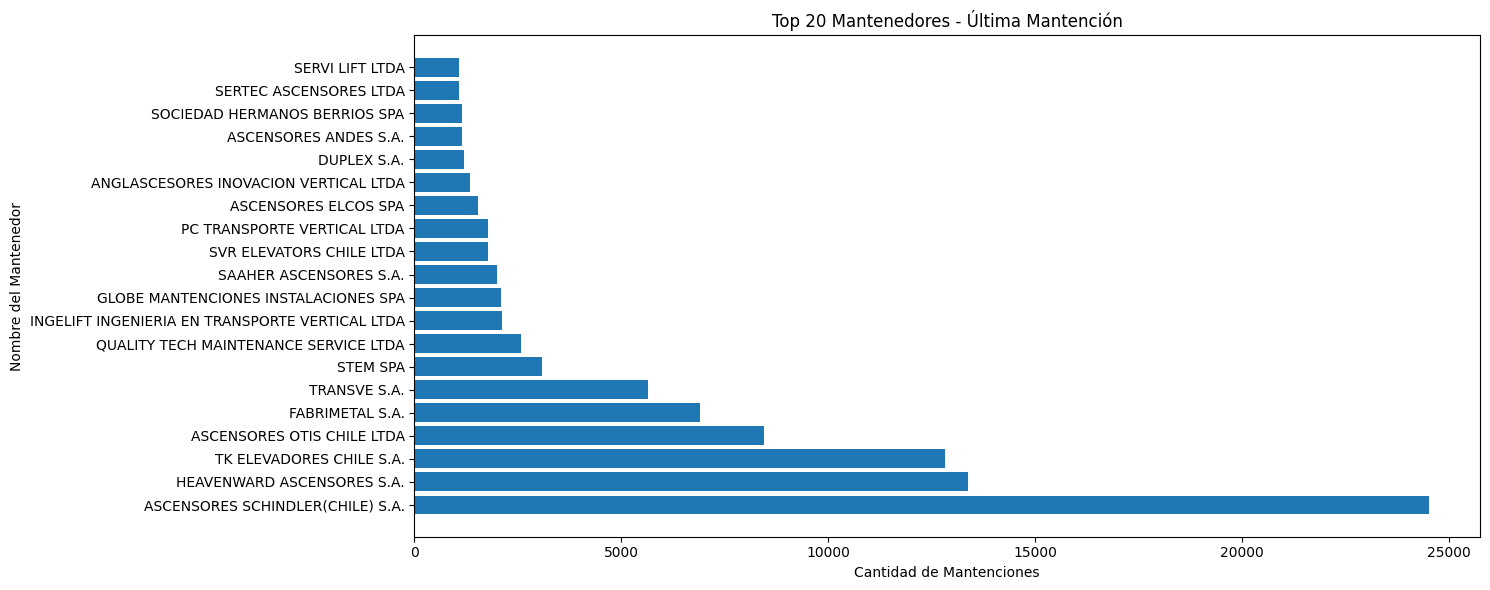

In [ ]:
# Suponiendo que 'data' es tu DataFrame y ya aplicaste las correcciones
top_20_mantenedores = data['NOMBRE MANTENEDOR ULTIMA MANTENCION'].value_counts().nlargest(20)

plt.figure(figsize=(15, 6))  # Ajusta el tamaño de la figura si es necesario

# Use barh for horizontal bar chart
plt.barh(y=top_20_mantenedores.index, width=top_20_mantenedores.values)

plt.yticks(rotation=0)  # You might want to adjust y-axis labels if needed
plt.ylabel('Nombre del Mantenedor')  # Swap x and y labels
plt.xlabel('Cantidad de Mantenciones') # Swap x and y labels
plt.title('Top 20 Mantenedores - Última Mantención')
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()

#Imprimir Data

In [ ]:
# df.to_csv('tu_archivo_limpio.csv', index=False)
#data.to_excel('DB_A.xlsx', index=False)

##Análisis Exploratorio

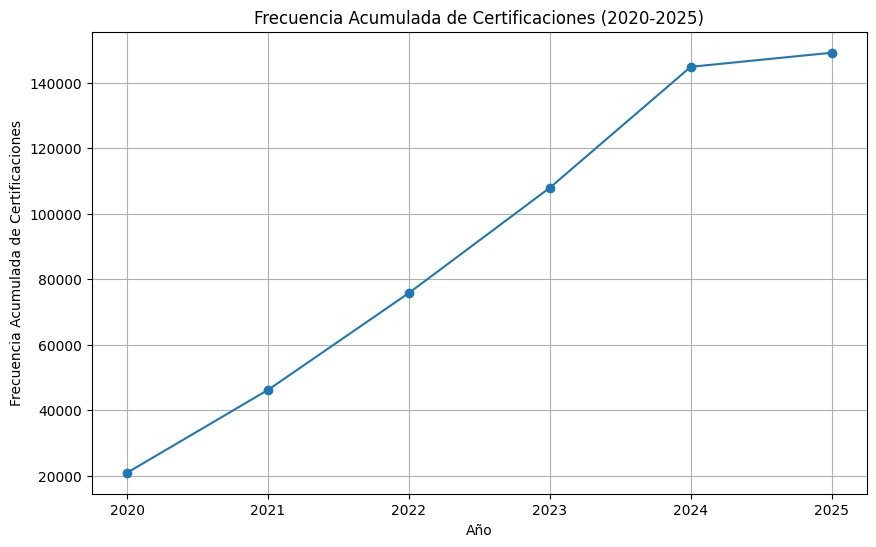

In [ ]:
#Gráfico de certificaciones acumulado 2020-2025
# Convertir la columna de fechas a datetime si no lo está ya
data['FECHA Y HORA DE LA CERTIFICACION'] = pd.to_datetime(data['FECHA Y HORA DE LA CERTIFICACION'])

# Filtrar datos para el rango de años de interés (2020-2025)
data_filtrado = data[(data['FECHA Y HORA DE LA CERTIFICACION'].dt.year >= 2020) & (data['FECHA Y HORA DE LA CERTIFICACION'].dt.year <= 2025)]

# Agrupar por año y contar las certificaciones
frecuencias_anuales = data_filtrado.groupby(data_filtrado['FECHA Y HORA DE LA CERTIFICACION'].dt.year).size()

# Calcular la frecuencia acumulada
frecuencia_acumulada = frecuencias_anuales.cumsum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(frecuencia_acumulada.index, frecuencia_acumulada.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Frecuencia Acumulada de Certificaciones')
plt.title('Frecuencia Acumulada de Certificaciones (2020-2025)')
plt.grid(True)
plt.show()


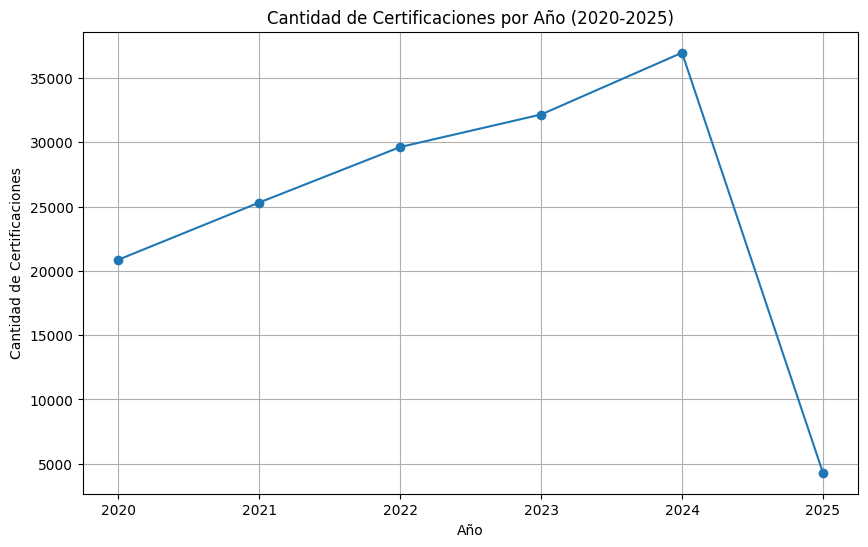

In [ ]:
##Gráfico de líneas cantidad de certificaciones anuales 2020-2025
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_anuales.index, frecuencias_anuales.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cantidad de Certificaciones')
plt.title('Cantidad de Certificaciones por Año (2020-2025)')
plt.grid(True)
plt.show()


In [ ]:
### Tabla comparativa de equipos certificos e identificados por empresa que en ese momento lleba la mantención ###

def tabla_comparativa_mantenedores(data, años, top_n=10):
    """
    Genera una tabla comparativa de la cantidad de equipos por mantenedor y año.

    Args:
        data: DataFrame con datos de certificaciones. Debe tener las columnas:
              'NOMBRE MANTENEDOR ULTIMA MANTENCION' y 'FECHA Y HORA DE LA CERTIFICACION'.
        años: Lista de años para incluir en la comparación.
        top_n: Cantidad de mantenedores principales a mostrar.

    Returns:
        DataFrame ordenado y estilizado con mantenedores como índice y años como columnas.
    """

    # Convertir a datetime
    data['FECHA Y HORA DE LA CERTIFICACION'] = pd.to_datetime(data['FECHA Y HORA DE LA CERTIFICACION'])

    # Crear un DataFrame vacío para ir acumulando conteos por año
    conteos_años = pd.DataFrame()

    for año in años:
        # Filtrar datos del año correspondiente
        data_año = data[data['FECHA Y HORA DE LA CERTIFICACION'].dt.year == año]

        # Contar mantenciones por mantenedor y almacenar resultado
        conteo = data_año['NOMBRE MANTENEDOR ULTIMA MANTENCION'].value_counts().rename(año)

        # Concatenar al DataFrame principal
        conteos_años = pd.concat([conteos_años, conteo], axis=1)

    # Llenar NaN con ceros
    conteos_años = conteos_años.fillna(0).astype(int)

    # Ordenar por el año más reciente para definir el top_n
    conteos_años = conteos_años.sort_values(by=años[-1], ascending=False).head(top_n)

    # Resetear índice para que "Mantenedor" sea una columna
    conteos_años.reset_index(inplace=True)
    conteos_años.rename(columns={'index': 'Mantenedor'}, inplace=True)

    return conteos_años

# Ejemplo de uso:
años_a_analizar = [2020, 2021, 2022, 2023, 2024]
tabla_resultante = tabla_comparativa_mantenedores(data, años_a_analizar)
tabla_resultante.style.background_gradient(cmap='Blues', subset=años_a_analizar)


,Mantenedor,2020,2021,2022,2023,2024
0,ASCENSORES SCHINDLER(CHILE) S.A.,3534,4357,4953,5309,5742
1,TK ELEVADORES CHILE S.A.,1357,1849,2619,3125,3485
2,HEAVENWARD ASCENSORES S.A.,1964,2246,2545,2891,3098
3,ASCENSORES OTIS CHILE LTDA,1171,1547,1650,1876,2062
4,FABRIMETAL S.A.,970,1054,1288,1504,1791
5,TRANSVE S.A.,864,1023,1215,1088,1313
6,STEM SPA,452,477,663,687,782
7,QUALITY TECH MAINTENANCE SERVICE LTDA,456,456,400,541,666
8,GLOBE MANTENCIONES INSTALACIONES SPA,211,307,448,492,603
9,SVR ELEVATORS CHILE LTDA,218,256,350,345,548


In [ ]:
### Cantidad de Equipos individualizados a febrero del 2025
cantidad_codigos = data['CODIGO'].nunique()
print(f"La cantidad de códigos de equipos sin repetición es: {cantidad_codigos}")


La cantidad de códigos de equipos sin repetición es: 41197


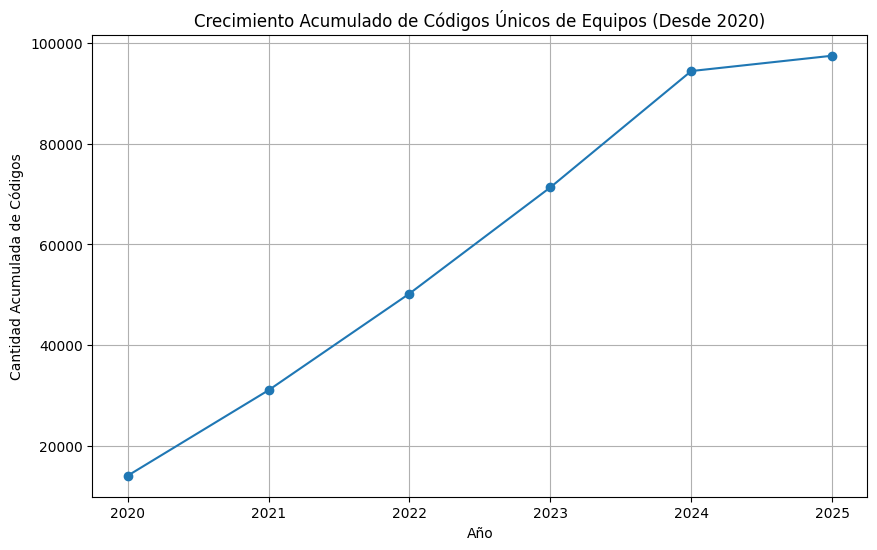

In [ ]:
# prompt: quiero visualizar el crecimiento a travez del tiempo desde el 2020  del crecimiento o incorporación de nuevos CODIGOS en el parque de equipos

import pandas as pd
import matplotlib.pyplot as plt
# Convertir la columna de fechas a datetime si no lo está ya
data['FECHA Y HORA DE LA CERTIFICACION'] = pd.to_datetime(data['FECHA Y HORA DE LA CERTIFICACION'])

# Filtrar datos desde 2020
data_desde_2020 = data[data['FECHA Y HORA DE LA CERTIFICACION'].dt.year >= 2020]

# Agrupar por año y contar los códigos únicos
codigos_por_año = data_desde_2020.groupby(data_desde_2020['FECHA Y HORA DE LA CERTIFICACION'].dt.year)['CODIGO'].nunique()

# Calcular el crecimiento acumulado
crecimiento_acumulado = codigos_por_año.cumsum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(crecimiento_acumulado.index, crecimiento_acumulado.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cantidad Acumulada de Códigos')
plt.title('Crecimiento Acumulado de Códigos Únicos de Equipos (Desde 2020)')
plt.grid(True)
plt.show()


In [ ]:
# prompt: quiero generar una tabla donde se pueda ver en que años se certificaron cada CODIGO entendiendo que CODIGO representa un ID de equipo de transporte vertical y que no siempre se certificada cada año. quiero que sea del 2020 al final del 2024. en español

import pandas as pd
# Crear una tabla pivote para visualizar las certificaciones por año y código
# Asegúrate de que la columna 'FECHA Y HORA DE LA CERTIFICACION' sea de tipo datetime

# Convertir 'FECHA Y HORA DE LA CERTIFICACION' a datetime si no lo es
data['FECHA Y HORA DE LA CERTIFICACION'] = pd.to_datetime(data['FECHA Y HORA DE LA CERTIFICACION'])

# Crear una columna 'Año' para facilitar el agrupamiento
data['Año'] = data['FECHA Y HORA DE LA CERTIFICACION'].dt.year

# Filtrar los datos para los años de interés (2020-2024)
data_filtrada = data[(data['Año'] >= 2020) & (data['Año'] <= 2024)]

# Crear la tabla pivote
tabla_certificaciones = data_filtrada.pivot_table(index='CODIGO', columns='Año', values='FECHA Y HORA DE LA CERTIFICACION', aggfunc='count', fill_value=0)

# Mostrar la tabla
tabla_certificaciones


Año,2020,2021,2022,2023,2024
CODIGO,,,,,
0110100004-01391001H,0,0,0,0,1
0110100006-10984002A,1,0,0,0,0
0110100031-00013001A,1,0,0,0,0
0110100052-00014001A,0,0,0,0,1
0110100062-00029001S,0,0,1,0,0
...,...,...,...,...,...
922002200-00016018A,1,0,0,0,1
922003367-00444001H,1,1,1,3,1
922003429-00018001A,0,1,0,0,0


In [ ]:
def tabla_certificaciones_por_codigo(data, años):
    # Asegurar formato datetime
    data['FECHA Y HORA DE LA CERTIFICACION'] = pd.to_datetime(data['FECHA Y HORA DE LA CERTIFICACION'])

    # Filtrar datos según rango de años
    data_filtrada = data[
        data['FECHA Y HORA DE LA CERTIFICACION'].dt.year.between(min(años), max(años))
    ]

    # Crear tabla pivote: contar certificaciones por año y código
    pivot = pd.pivot_table(
        data_filtrada,
        index='CODIGO',
        columns=data_filtrada['FECHA Y HORA DE LA CERTIFICACION'].dt.year,
        values='FECHA Y HORA DE LA CERTIFICACION',
        aggfunc='count',
        fill_value=0
    )

    # Convertir conteos a indicador de certificación (Sí/No)
    pivot_binario = pivot.applymap(lambda x: '✅' if x > 0 else '❌')

    # Ordenar columnas cronológicamente
    pivot_binario = pivot_binario.reindex(columns=sorted(años))

    return pivot_binario

# Ejemplo de uso:
años_a_analizar = [2020, 2021, 2022, 2023, 2024]
tabla_resultante = tabla_certificaciones_por_codigo(data, años_a_analizar)

# Mostrar resultado
tabla_resultante

<ipython-input-32-c5947a7548a7>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_binario = pivot.applymap(lambda x: '✅' if x > 0 else '❌')


FECHA Y HORA DE LA CERTIFICACION,2020,2021,2022,2023,2024
CODIGO,,,,,
0110100004-01391001H,❌,❌,❌,❌,✅
0110100006-10984002A,✅,❌,❌,❌,❌
0110100031-00013001A,✅,❌,❌,❌,❌
0110100052-00014001A,❌,❌,❌,❌,✅
0110100062-00029001S,❌,❌,✅,❌,❌
...,...,...,...,...,...
922002200-00016018A,✅,❌,❌,❌,✅
922003367-00444001H,✅,✅,✅,✅,✅
922003429-00018001A,❌,✅,❌,❌,❌
